In [1]:
import pandas as pd
import os
from get_repo_name import get_repo_name

repo_name = get_repo_name ( os.path.basename ( os.getcwd() ) )
dataset_path = f'datasets/{repo_name}_groupedby_yearmonth.csv'
df = pd.read_csv (dataset_path)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2018-03,44,14288,1088,1648.0,321.0,12476.0,0.732213,0.929244,0.995241
1,2018-04,190,9927,7781,8997.0,1650.0,69421.0,0.582593,0.861468,0.956504
2,2018-05,132,17042,9813,14041.0,2339.0,114022.0,0.485103,0.865825,0.879383
3,2018-06,100,5122,1679,7334.0,1324.0,62950.0,0.684407,0.836560,0.873635
4,2018-07,77,6560,1906,6838.0,1184.0,59589.0,0.515976,0.722901,0.824526
5,2018-08,99,6748,2539,6640.0,1156.0,54909.0,0.737300,0.905713,0.818630
6,2018-09,36,1204,511,2679.0,484.0,23183.0,0.684677,0.900242,0.885714
7,2018-10,9,1137,2587,133.0,30.0,816.0,0.666667,0.000000,0.000000
8,2018-11,6,554,305,558.0,85.0,4781.0,0.628205,0.833333,0.833333
9,2018-12,27,936,165,621.0,96.0,5726.0,0.000000,1.000000,1.000000


In [2]:
df['dmm_unit_size'] = df['dmm_unit_size'].fillna(0)
df['dmm_unit_complexity'] = df['dmm_unit_complexity'].fillna(0)
df['dmm_unit_interfacing'] = df['dmm_unit_interfacing'].fillna(0)

In [3]:
start_date = df.year_month[0][5:7] + '-01-' + df.year_month[0][0:4]
end_date = df.year_month[len(df.year_month) - 1][5:7] + '-01-' + df.year_month[len(df.year_month) - 1][0:4]
dfperiod = pd.period_range(start_date, end_date, freq='M')

def new_zero_row ( year_month ):
    
    new_row = {
        'year_month': year_month,
        'commit_count': 0,
        'additions': 0,
        'deletions': 0,
        'agg_loc': 0,
        'agg_complexity': 0,
        'agg_token_count': 0,
        'dmm_unit_size': 0,
        'dmm_unit_complexity': 0,
        'dmm_unit_interfacing': 0
    }
    
    return new_row

for year_month in dfperiod:
    if df [ ( df['year_month'] == str(year_month) ) ].shape[0] == 0:
        df = df.append ( new_zero_row(year_month), ignore_index = True )

df.shape

(53, 10)

In [4]:
df['year_month'] = df['year_month'].astype(str)
df = df.sort_values ( by=['year_month'] )
df.reset_index(drop=True, inplace=True)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2018-03,44,14288,1088,1648.0,321.0,12476.0,0.732213,0.929244,0.995241
1,2018-04,190,9927,7781,8997.0,1650.0,69421.0,0.582593,0.861468,0.956504
2,2018-05,132,17042,9813,14041.0,2339.0,114022.0,0.485103,0.865825,0.879383
3,2018-06,100,5122,1679,7334.0,1324.0,62950.0,0.684407,0.836560,0.873635
4,2018-07,77,6560,1906,6838.0,1184.0,59589.0,0.515976,0.722901,0.824526
5,2018-08,99,6748,2539,6640.0,1156.0,54909.0,0.737300,0.905713,0.818630
6,2018-09,36,1204,511,2679.0,484.0,23183.0,0.684677,0.900242,0.885714
7,2018-10,9,1137,2587,133.0,30.0,816.0,0.666667,0.000000,0.000000
8,2018-11,6,554,305,558.0,85.0,4781.0,0.628205,0.833333,0.833333
9,2018-12,27,936,165,621.0,96.0,5726.0,0.000000,1.000000,1.000000


In [5]:
df.to_csv ( f'datasets/{repo_name}_final.csv', index = False )

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sb

def plot_line ( yplot, idx ):

    covid_proxy_ym = '2020-03'
    fig, ax = plt.subplots ( figsize = (24, 8) )
    ax.plot ( df['year_month'], df[yplot], color = 'purple' )
    ax.axvline ( x = covid_proxy_ym, linewidth=2, color='r', label = 'Initial Covid-19 Lockdowns' )
    
    ax.set_title ( repo_name + ': month vs ' + yplot, fontsize = 20 )
    ax.set_xlabel ( 'month', fontsize = 15 )
    ax.set_ylabel ( yplot, fontsize = 15 )
    ax.legend()
    
    plt.setp ( ax.get_xticklabels(), fontsize = 12 )
    plt.setp ( ax.get_yticklabels(), fontsize = 12 )
    
    locator = mdate.MonthLocator()
    plt.gca().xaxis.set_major_locator(locator)
    plt.gcf().autofmt_xdate()
    plt.gcf().autofmt_xdate()
    plt.savefig ( f'images/{idx}. {yplot}.jpg', bbox_inches = 'tight' )

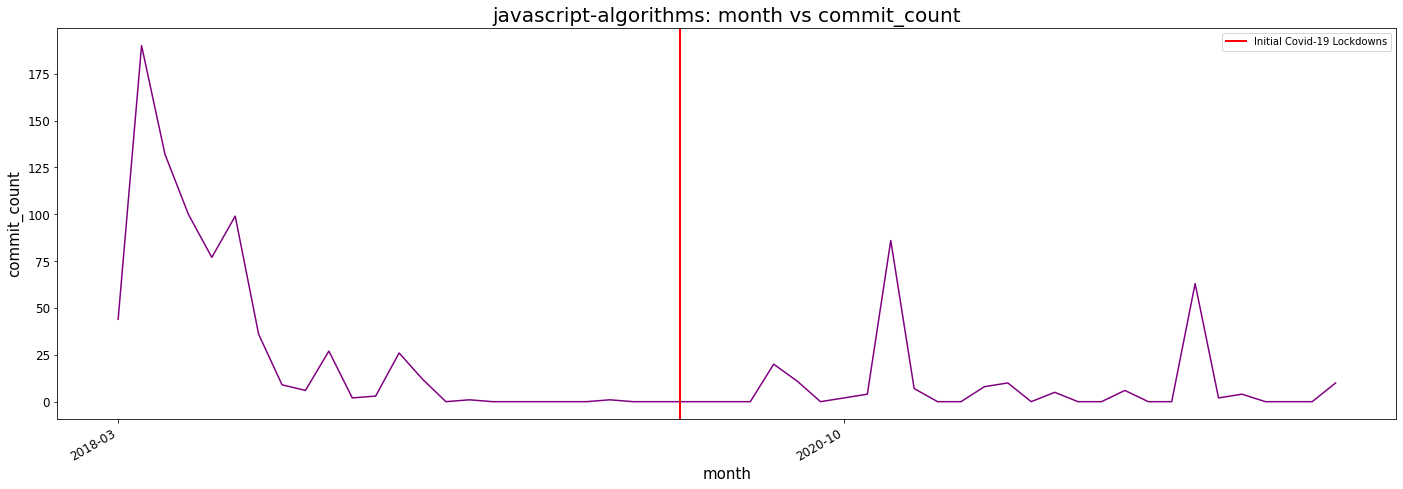

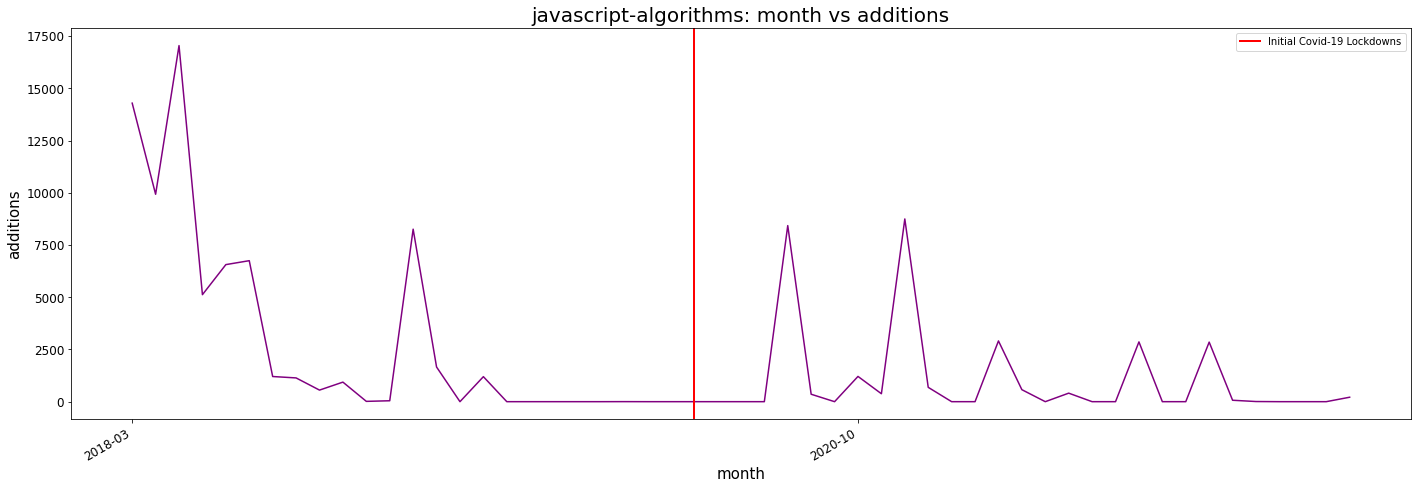

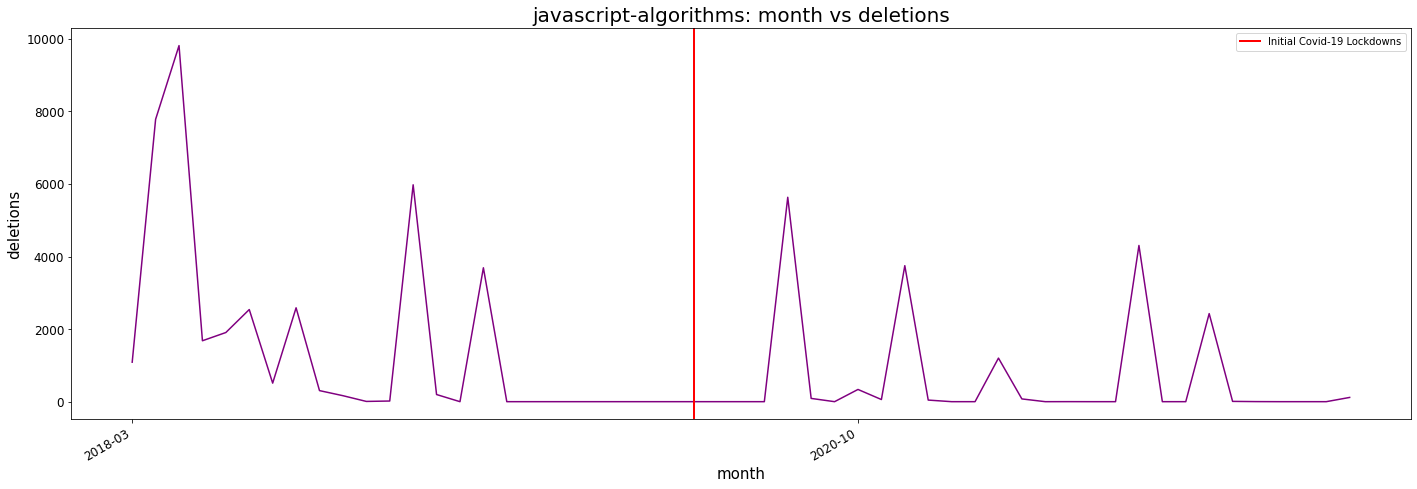

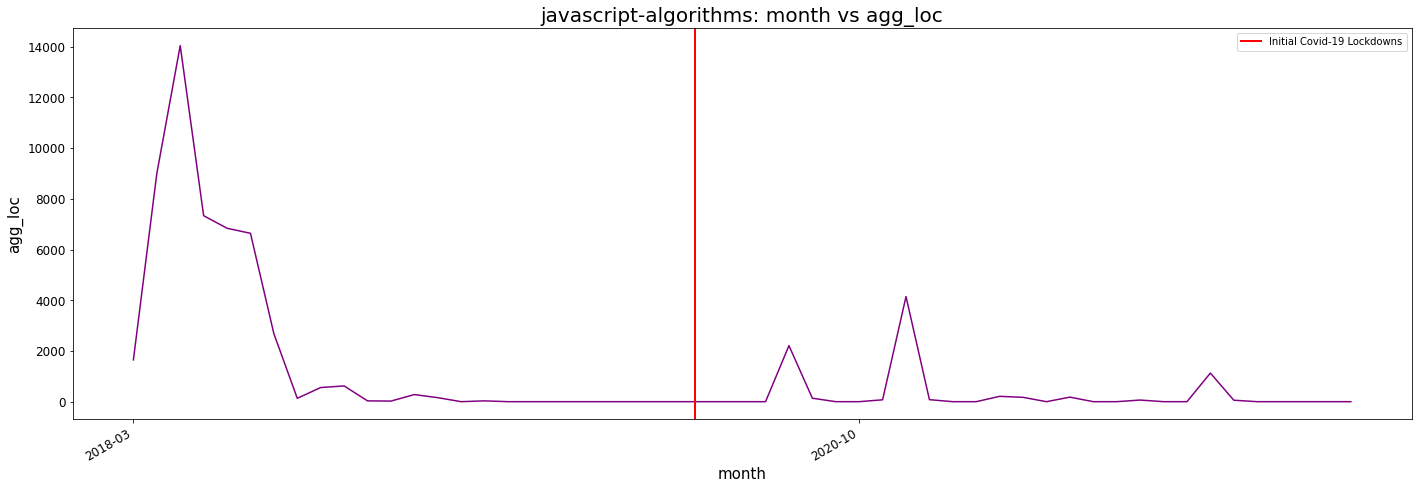

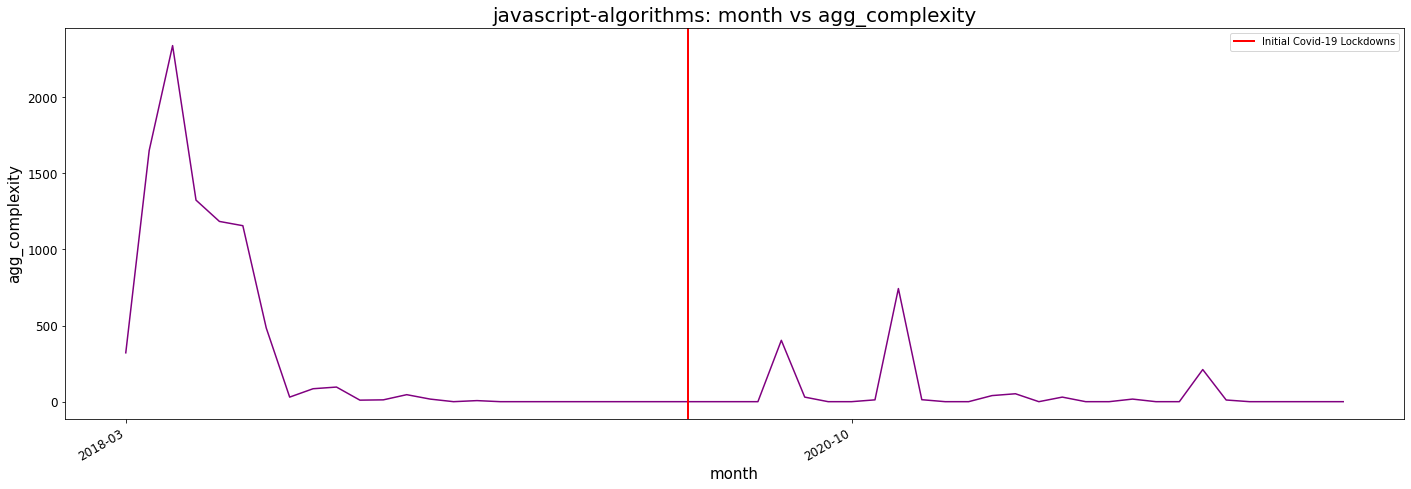

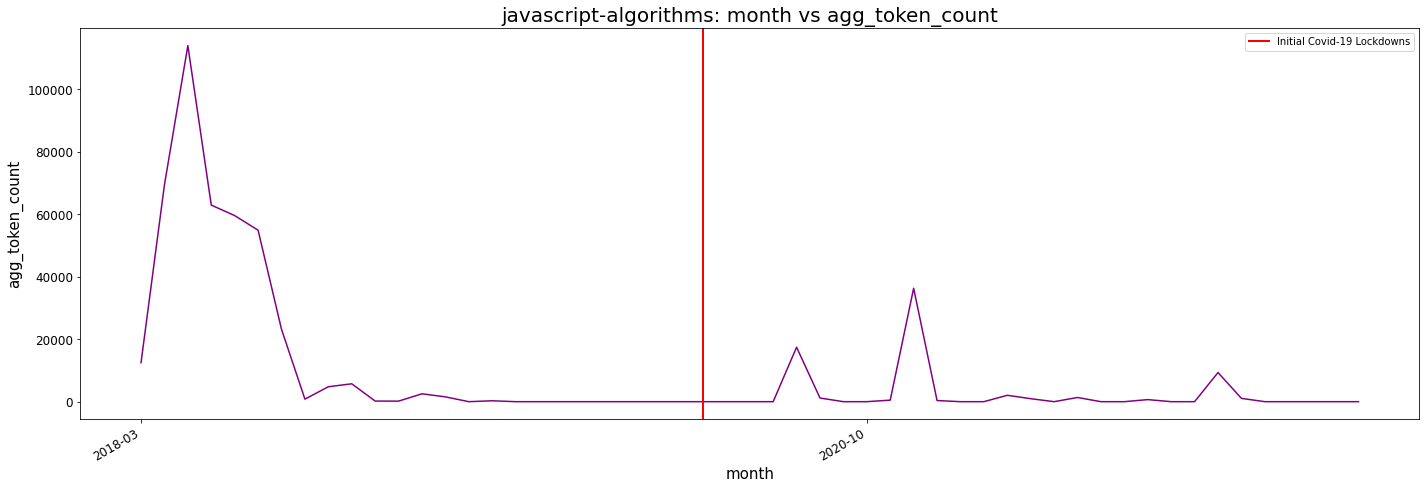

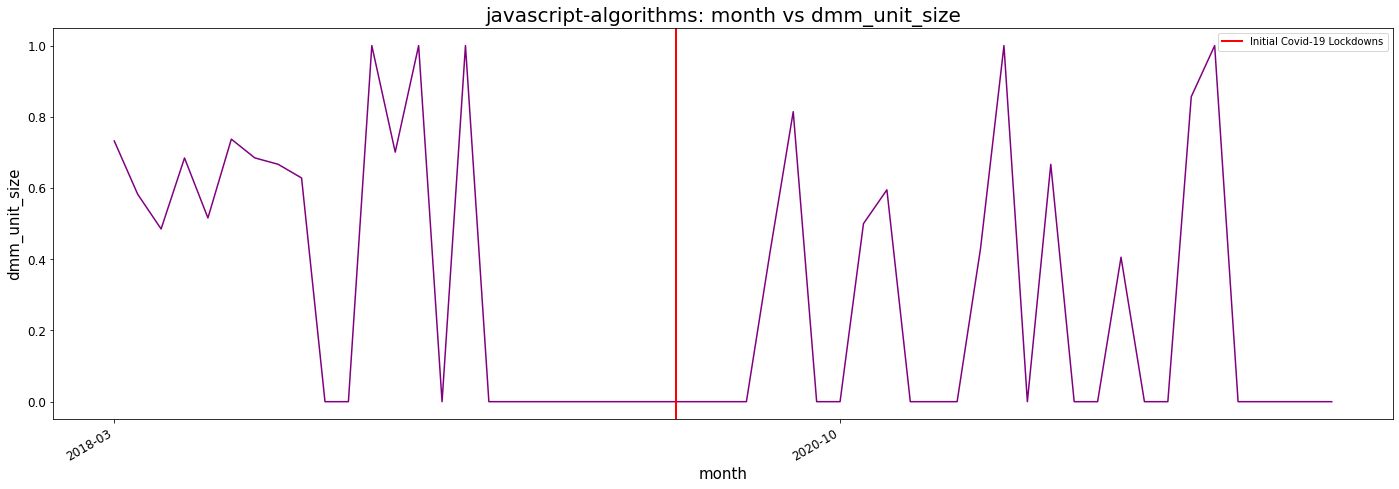

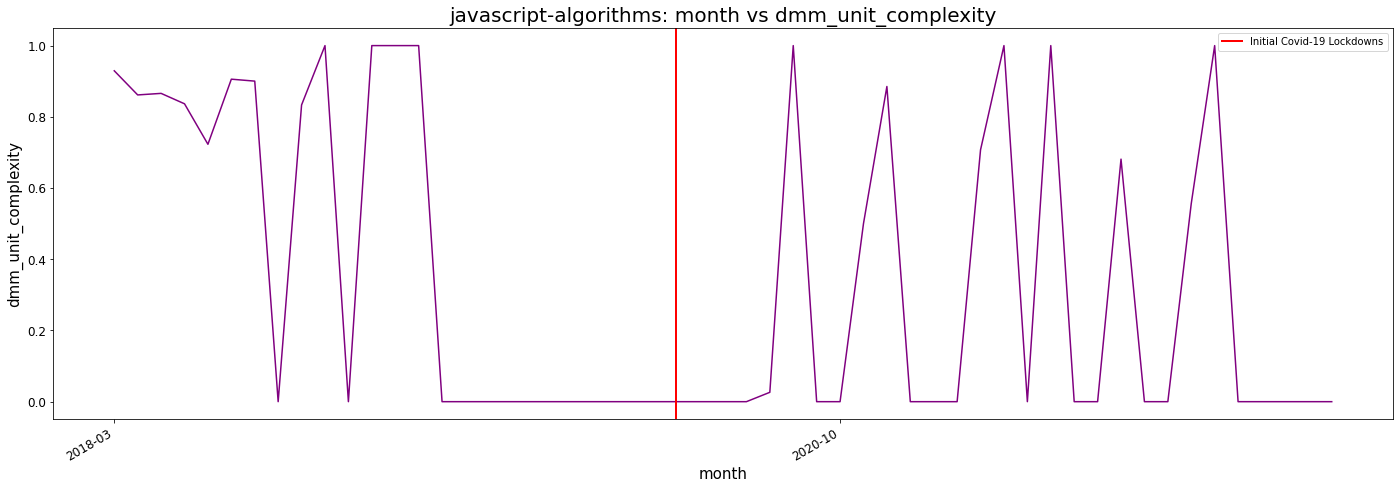

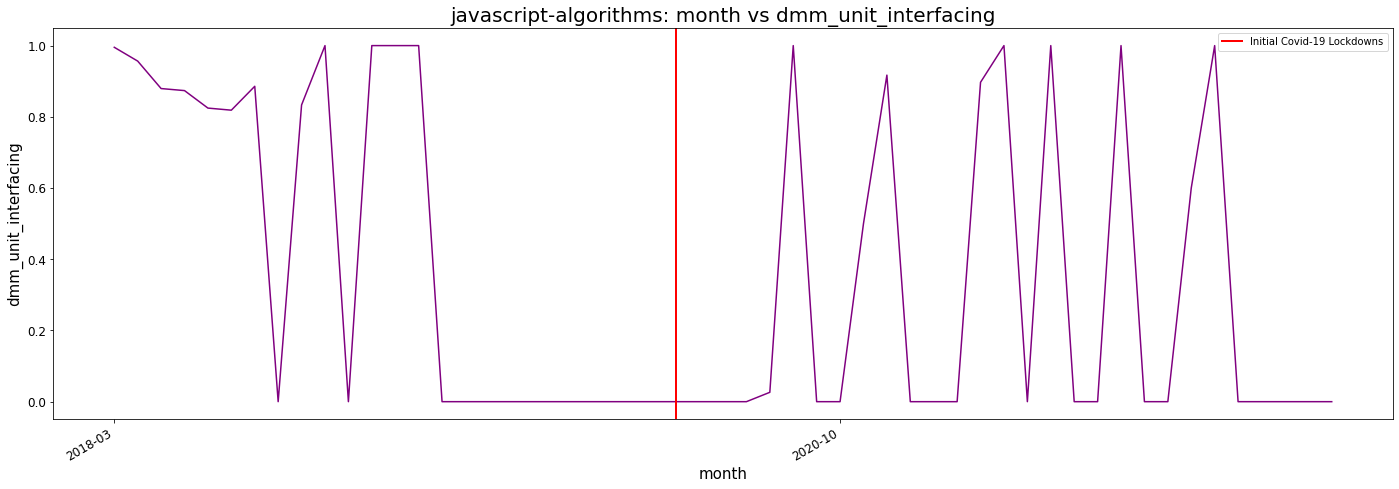

In [7]:
for idx in range ( 1, len(df.columns) ):
    plot_line ( df.columns[idx], idx )